## **09. K-MEANS**

## **1. Instalaciones y Importaciones**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


## **2. Subimos Database**

In [ ]:

url = "https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"
df = pd.read_csv(url)

## **3. Abrimos Database** Solo nos quedamos con el que nos dice el Ejercicio




In [ ]:
df = df[["Latitude", "Longitude", "MedInc"]]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


## **4. Descrición de Variables**

In [ ]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: Latitude
          Conteo  Porcentaje (%)
Latitude                        
34.06        244            1.18
34.05        236            1.14
34.08        234            1.13
34.07        231            1.12
34.04        221            1.07
...          ...             ...
41.53          1            0.00
35.86          1            0.00
35.85          1            0.00
35.89          1            0.00
41.20          1            0.00

[862 rows x 2 columns]

Columna: Longitude
           Conteo  Porcentaje (%)
Longitude                        
-118.31       162            0.78
-118.30       160            0.78
-118.29       148            0.72
-118.27       144            0.70
-118.32       142            0.69
...           ...             ...
-123.13         1            0.00
-123.43         1            0.00
-123.12         1            0.00
-116.27         1            0.00
-123.26         1            0.00

[844 rows x 2 columns]

Columna: MedInc
         Conteo  Porcenta

## **5. Cribado Manual**

## 5.1 Reemplazar Valores Atipicos por NAN. No tenemos que reemplazar valores típicos por NAN.

## 5.2 Identificar columnas con columnas constantes. No hace falta.

In [ ]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## 5.3. Eliminamos filas y columnas duplicadas. No hace falta.

In [ ]:
df.duplicated().sum()

np.int64(5)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.T.duplicated(keep=False)

,0
Latitude,False
Longitude,False
MedInc,False


## 5.4 Eliminar Columnas redundantes. No tenemos ninguna

## **6. Eliminar columnas Data leakage**

## **7. Analizar Valores sin sentido** No tenemos valores sin sentido

## **8. Valores faltantes por columna**

In [ ]:
df.shape

(20635, 3)

In [ ]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0


## **9. Valores faltantes por filas.**

In [ ]:
df.isnull().any(axis=1).sum()

np.int64(0)

In [ ]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,Latitude,Longitude,MedInc


In [ ]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,Latitude,Longitude,MedInc


##  **10. Convertir variables Y a binaria.** No hace falta.

##  **11. Categorizar Variables.**

In [ ]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index([], dtype='object')


## **12. Borrar las categorías que estaban en String** NO hace falta.

## **13. Hacer Train-Split**

In [ ]:
X_train, X_test = train_test_split(
    df, test_size=0.2, random_state=42
)

## **14. Imputar** No hace falta

## **15.Outliers**

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,16508.0,35.646109,2.141409,32.5400,33.9300,34.2600,37.720000,41.9500
Longitude,16508.0,-119.582326,2.008715,-124.3500,-121.8100,-118.5000,-118.010000,-114.3100
MedInc,16508.0,3.875853,1.911778,0.4999,2.5588,3.5332,4.755925,15.0001


In [ ]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)

In [ ]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,13408
-1,3100


## **16.Selección de características** No hace falta

## **17. Medir correlación de Variables**

In [ ]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
Latitude,7.328047
Longitude,7.284658
MedInc,1.062931


## **18. Escalado de Datos**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

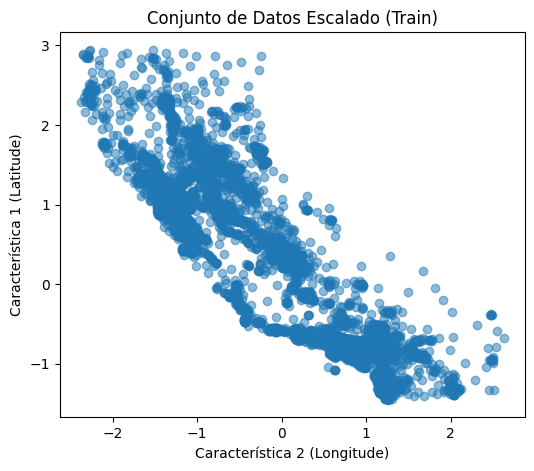

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(
    X_train_scaled[:, 1],  # Longitude
    X_train_scaled[:, 0],  # Latitude
    alpha=0.5
)

plt.xlabel("Característica 2 (Longitude)")
plt.ylabel("Característica 1 (Latitude)")
plt.title("Conjunto de Datos Escalado (Train)")
plt.show()

## **19. Entrenamiento de Datos**

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=6, random_state=42)

In [ ]:
df_scaled = scaler.transform(df)

df["cluster"] = kmeans.predict(df_scaled)
df["cluster"] = df["cluster"].astype("category")

df.head()

,Latitude,Longitude,MedInc,cluster
0,37.88,-122.23,8.3252,0
1,37.86,-122.22,8.3014,0
2,37.85,-122.24,7.2574,0
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,4


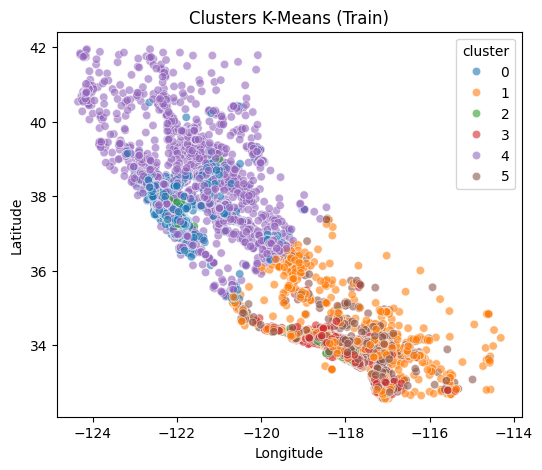

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df.loc[X_train.index, "Longitude"],
    y=df.loc[X_train.index, "Latitude"],
    hue=df.loc[X_train.index, "cluster"],
    palette="tab10",
    alpha=0.6
)
plt.title("Clusters K-Means (Train)")
plt.show()

## **20. Predicción**

In [ ]:
test_clusters = kmeans.predict(X_test_scaled)

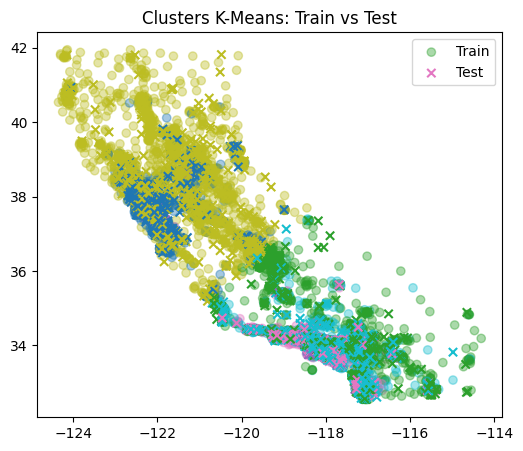

In [ ]:
plt.figure(figsize=(6,5))

plt.scatter(
    X_train["Longitude"],
    X_train["Latitude"],
    c=df.loc[X_train.index, "cluster"],
    cmap="tab10",
    alpha=0.4,
    label="Train"
)

plt.scatter(
    X_test["Longitude"],
    X_test["Latitude"],
    c=test_clusters,
    cmap="tab10",
    marker="x",
    label="Test"
)

plt.legend()
plt.title("Clusters K-Means: Train vs Test")
plt.show()


## **21. Modelo Supervisado**

In [ ]:
X = df[["Latitude", "Longitude", "MedInc"]]
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **22. Entrenamiento Modelo Supervisado**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## **23. Evaluación Modelo Supervisado**

In [ ]:

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.98      0.99      0.99      1013
           2       0.98      0.98      0.98        65
           3       1.00      0.98      0.99       386
           4       0.99      0.99      0.99      1078
           5       0.98      0.98      0.98      1002

    accuracy                           0.99      4127
   macro avg       0.99      0.99      0.99      4127
weighted avg       0.99      0.99      0.99      4127

